<h1 style="text-align: center">EIGENFACES</h1>
<hr>    
Um dos usos mais icônicos da decomposição SVD de matrizes é chamado de eigenfaces. É utilizado a decomposição SVD em um dataset de treinamento que contém imagens variadas de pessoas. Resultando em uma x de eigenfaces, que servirão como base para reconstruir imagens.

<h2>Importando bibliotecas</h2>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import glob
from PIL import Image

<h2>Construindo a matriz de imagens</h2>

Cada imagem possui uma largura de n pixels e altura de m pixels (m x n). Para facilitar o uso das imagens em uma matriz, cada uma será transformada em um vetor coluna (1 x mn). Como o ilustrado na imagem:
<div style="text-align: center">
    <img src="imagens/ilustraçoes03.png" alt="ilustração das imagens em vetores" width=300>
</div>

In [3]:
# Cria uma lista com todos os nomes das imagens
fotos = [img for img in glob.glob("lfw*/*.jpg")]

# Cria uma matriz nula para comportar os pixels das imagens
m = np.zeros((10000, 250*250))

# Transforma as imagens 250x250 em vetores de 62500 linhas e transforma em uma matriz numpy
# Padroniza a cor para tons acinzentados
# Em seguida, as insere na matriz nula
for i in range(10000):
  m[i] = np.array(Image.open(fotos[i]).convert('L').getdata())


Temos 2500 imagens e sendo assim nossa matriz terá 2500 colunas. A quantidade de linhas é definida pela multiplicação da largura pela altura da imagem em pixels. Nesse caso 250 x 250 = 62500

<div style="text-align: center">
    <img src="imagens/ilustraçoes01.png" alt="ilustração das imagens em vetores" width=300>
</div>

In [3]:
# Formato da matriz final com as imagens
print(m.shape)

(10000, 62500)


<h2> Decomposição SVD e eigenfaces</h2>

SVD ( standard values decomposition, ou decomposição de valores singulares em português ) refere-se a uma decomposição feita em matrizes reais ou complexas.
A decomposição fica no formato: $A = U \Sigma V^T$, para uma matriz A.


#### > Matriz $\Sigma$
A matriz $\Sigma_{mxn}$ é calculada partindo dos autovalores da matriz $AA^T$ (ou $A^TA$). Isto é: encontrar todos os valores que satisfaçam $AA^Tx=\lambda x$

Definimos $\sigma_j = \sqrt(\lambda_j)$, chamados de valores singulares da matriz.

E logo após, para encontrar $\Sigma$ é necessário distribuir os $\sigma_j$ ao longo de uma diagonal, ou seja: $\Sigma_{jj} = \sigma_j = \sqrt(\lambda_j $.

#### > Matriz V
Para matriz $V_{nxn}$, nós precisamos encontrar os autovetores de $A^TA$ associados aos autovalores $\sigma_j$, de forma a fazer uma base ( pode ser necessário ter que completar a base "manualmente", a depender da quantidade de autovalores ).

Sendo assim teremos n autovetores $v$ que, em conjunto, formam V.

#### > Matriz U
Mesmo processo para U, porém os autovalores estão serão de $AA^T$.
Uma forma alternativa de encontrar as colunas de $U_{mxm}$ é por meio da fórmula $u_i=\frac{Av_i}{\sigma}$

Após feita a decomposição SVD, obtemos três matrizes:

<div style="text-align: center">
    <img src="imagens/ilustraçoes02.png" alt="ilustração das imagens em vetores" width=900>
</div>

<h2>Forma padrão de cálculo dos componentes de SVD</h2>

$$A_{mxn}A^T_{nxm} = U_{mxr}\Sigma^2_{rxr} U^T_{rxn} = \begin{bmatrix} | & ... & | \\ u_1 & ... & u_r \\ | & ... & | \end{bmatrix}_{mxr} \begin{bmatrix} \sigma^2_1 & ... & 0 \\ 0 & ... & \sigma^2_r \\ 0 & ... & 0 \end{bmatrix}_{rxr}\begin{bmatrix} -- & u_1^T & -- \\ ... & ... & ... \\ -- & u_r^T & -- \end{bmatrix}_{rxn}$$

$$A^T_{nxm}A_{mxn} = V_{nxr}\Sigma^2_{rxr} V^T_{rxm} = \begin{bmatrix} | & ... & | \\ v_1 & ... & v_r \\ | & ... & | \end{bmatrix}_{nxr} \begin{bmatrix} \sigma^2_1 & ... & 0 \\ 0 & ... & \sigma^2_r \\ 0 & ... & 0 \end{bmatrix}_{rxr}\begin{bmatrix} -- & v_1^T & -- \\ ... & ... & ... \\ -- & v_r^T & -- \end{bmatrix}_{rxm}$$

<h2>Treinamento com uso de 5000 de 10000</h2>

In [8]:
# Quantidade de imagens para o treinamento
faces_de_treinamento = m[:5000]

# Criação da face "média"
face_media = np.mean(faces_de_treinamento, axis = 0)

# Calculo da decomposição svd
X = faces_de_treinamento - np.tile(face_media, (faces_de_treinamento.shape[0], 1))
X = X.T
U, S, VT = np.linalg.svd(X, full_matrices = 0)

(-0.5, 249.5, 249.5, -0.5)

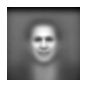

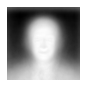

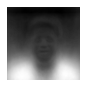

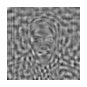

In [13]:
#  Plotando a face média e as primeiras colunas das eigenfaces
fig1 =  plt.figure()
ax1 = fig1.add_subplot(141)
img_avg = ax1.imshow(np.reshape(face_media, (250, 250)))
img_avg.set_cmap("gray")
plt.axis("off")

fig1 =  plt.figure()
ax1 = fig1.add_subplot(142)
img_avg = ax1.imshow(np.reshape(U[:, 0], (250, 250)))
img_avg.set_cmap("gray")
plt.axis("off")

fig1 =  plt.figure()
ax1 = fig1.add_subplot(143)
img_avg = ax1.imshow(np.reshape(U[:, 1], (250, 250)))
img_avg.set_cmap("gray")
plt.axis("off")

fig1 =  plt.figure()
ax1 = fig1.add_subplot(144)
img_avg = ax1.imshow(np.reshape(U[:, 500], (250, 250)))
img_avg.set_cmap("gray")
plt.axis("off")


Nas quatro imagens de exemplo podemos ver a matriz com a face média, a primeira, segunda e da uma outra coluna da matriz U (Detentora das eigenfaces). Com isso, veja que com o aumento do número de análise, sob as eigenfaces, mais abstrato fica a formação da imagem com características para a reconstrução de uma outra. Dessa forma, veja que as primeiras eigenfaces, juntamente com os primeiros valores de $\Sigma$, tem um peso maior na reformulação de imagens.

<h2>Reformulação de uma imagem com uso limitante de componentes</h2>

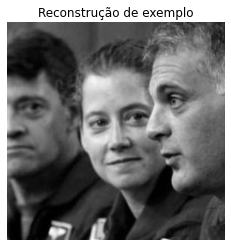

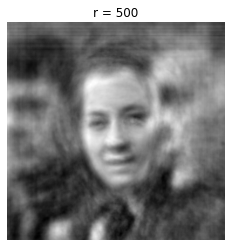

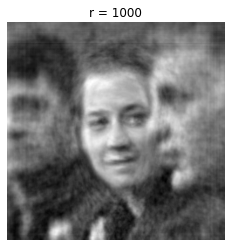

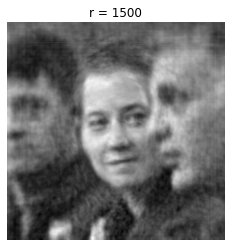

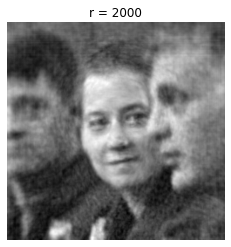

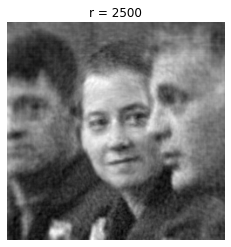

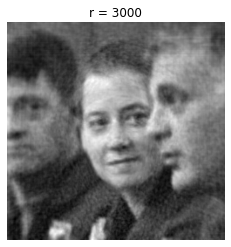

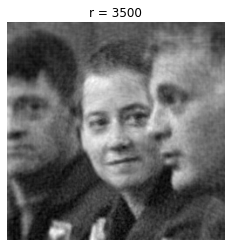

In [12]:
algo = np.array(Image.open("imagens/pessoa_crop.jpg").convert('L').getdata())

def reconstrucao(foto, r):
# plotando a imagem de alguem que não está no treinamento
    face_de_teste = foto
    plt.imshow(np.reshape(face_de_teste, (250, 250)))
    plt.set_cmap("gray")
    plt.title("Exemplo para reconstrução")
    plt.axis("off")
    plt.show()

    # Reconstruindo um rosto de uma pessoa que não estava no treinamento
    face_de_testeMS = face_de_teste - face_media
    face_de_testeMS = face_de_testeMS.T
    r_list = range(500, r + 1, 500)

    # plotando a reconstrução com diferentes quantidades de valores principais
    for r in r_list:
        face_de_reconhecimento = face_media.T + np.matmul(U[:,:r], np.matmul(U[:, :r].T, face_de_testeMS))
        img = plt.imshow(np.reshape(face_de_reconhecimento, (250, 250)))
        img.set_cmap("gray")
        plt.title("r = " + str(r))
        plt.axis("off")
        plt.show()

reconstrucao(m[9805], 3500)

<h2>Conclusões e considerações finais</h2>

O primeiro ponto a se falar é sobre a base de dados escolhida. Nossa base possuí cerca de 13300 imagens de rostos famosos. A primeira vista é incrível possuir uma base tão vasta e seguindo padrões necessários ( como a largura e altura das imagens ). Porém, há uma característica nela que a torna limitante, os rostos estão nas mais diversas posíções, com expressões faciais totalmente aleatórias, sem padrão de iluminação e em alguns casos com até mais de um rosto. Diferentemente de bases mais "controladas", a nossa necessita que utilizemos uma número alto de imagens no treinamento do eigenfaces. Fazer o treinamento com um número baixo resulta em rostos reconstruídos que lembram, no máximo, o formato do rosto do original.

<div style="text-align: center">
    <h2>Treinamento feito com 1000 células</h2>
    <img src="imagens/exemplo_1.png" alt="ilustração das imagens em vetores" width=300>
    <img src="imagens/treinamento_exemplo_1.png" alt="ilustração das imagens em vetores" width=300>
</div>
<div style="text-align: center">
    <h2>Treinamento feito com 2500 células</h2>
    <img src="imagens/exemplo_2.png" alt="ilustração das imagens em vetores" width=300>
    <img src="imagens/treinamento_exemplo_2.png" alt="ilustração das imagens em vetores" width=300>
</div>

Outra característica que ao longo dos teste se tornou evidente é que, devido ao grande número de $\sigma$ ao longo de $\Sigma$, as imagens reconstruídas ficam altamente reconheciveis. A chegar num ponto em que aumentar o número de $\sigma$ utilizados na reconstrução altera muito pouco o resultado.

Isso ocorre devido ao fato de que os autovalores são ordenados por relevância. Em outras palavras: $\sigma_1 > \sigma_2 > \sigma_3 > \dots > \sigma_r$

Por fim, gostaria de acrescentar que os dados e o script está disponível no repositório: https://github.com/GustavoSanches55/eigenfaces

<hr>
<div style="text-align: right; font-size: 12px; line-height: 10px;"> 
    <p>Um trabalho feito por:</p>
    <p>Gustavo Sanches</p>
    <p>Kayo Yokoyama</p></div>